In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [23]:
# let's import all of our files
# first we need to know the filenames
files = os.listdir("AnalyzedData/")
files = [x for x in files if 'hyper' not in x]

# now let's create a dict with each df and filename
# we will need the file names when we go to make the plots
df_list = {}
for filename in files:
    df = pd.read_csv(f"AnalyzedData/{filename}", index_col=None)
    df.drop(['Unnamed: 0', '0'], axis=1,inplace=True)
    df.rename(columns={'1':'MSE'},inplace=True)
    df_list[filename] = df

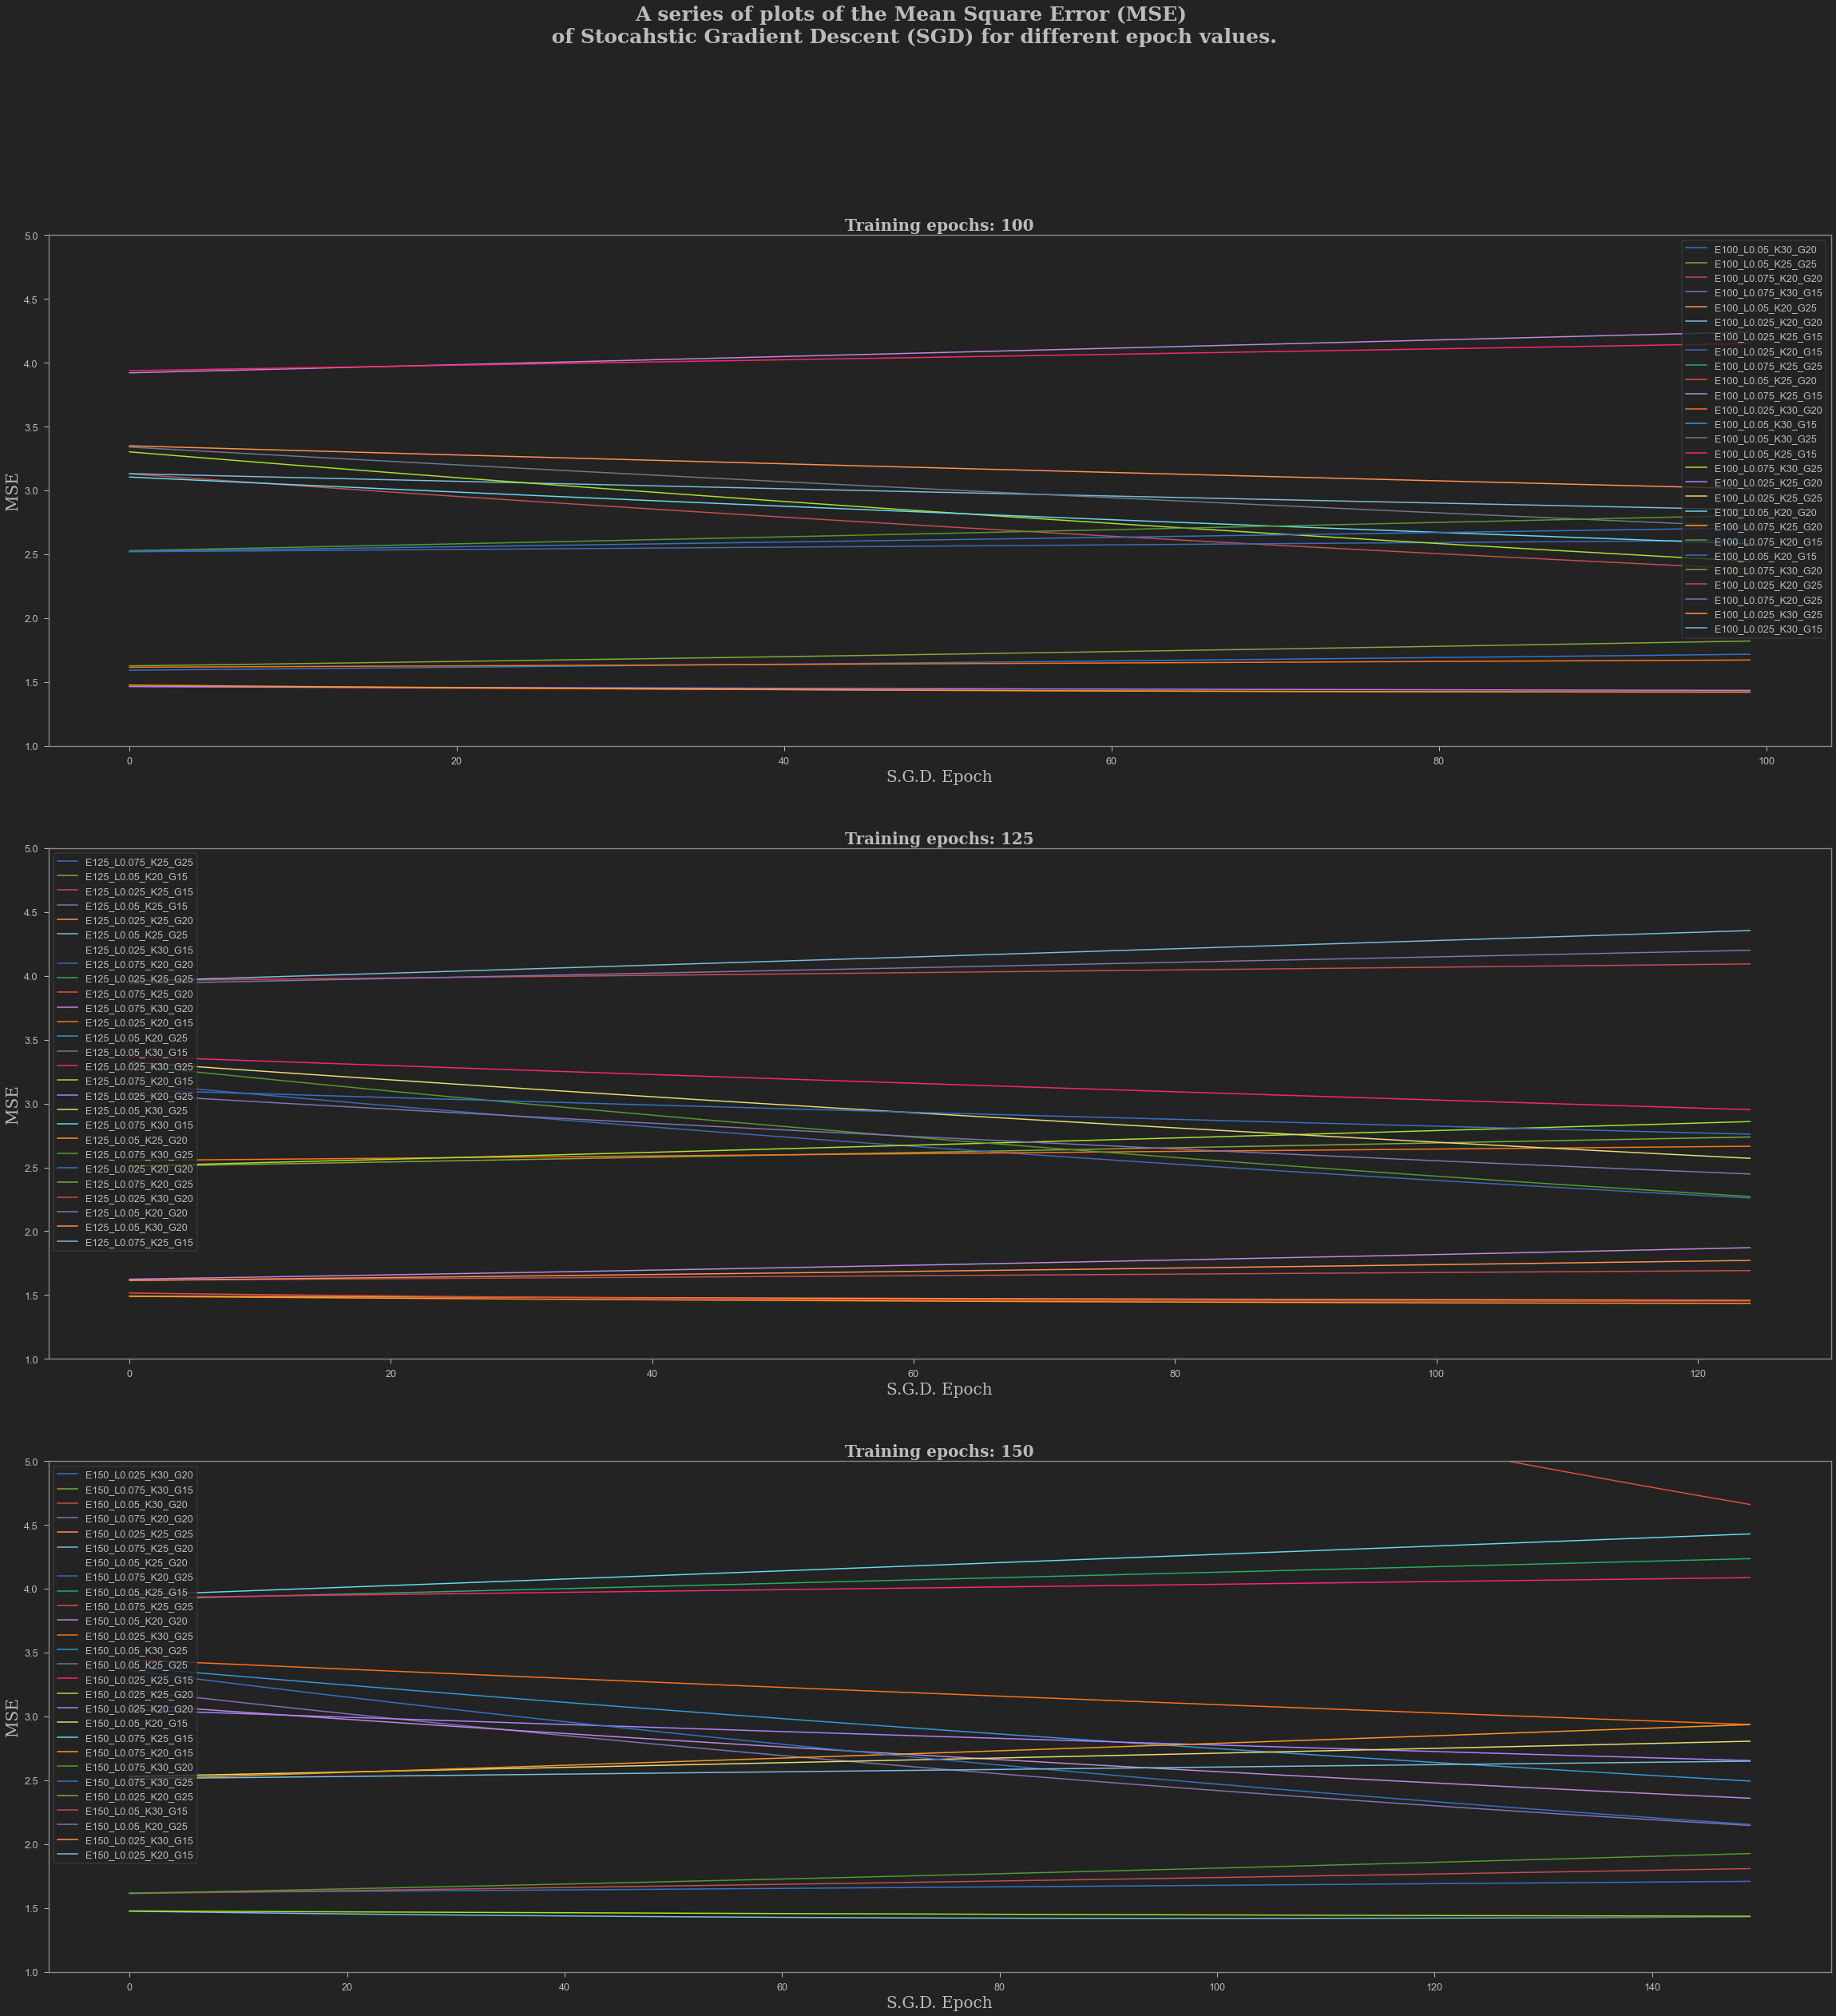

In [41]:
supTitleFonts = {'family':'serif',
              'size': 25,
              'weight': 'bold'}
titleFonts = {'family':'serif',
              'size': 20,
              'weight': 'bold'}
axisFonts = {'family':'serif',
              'size': 20}
# let's visualize the MSE as a function of training epoch.
fig, axs = plt.subplots(3, figsize=(40, 40))
fig.suptitle("A series of plots of the Mean Square Error (MSE)\n of Stocahstic Gradient Descent (SGD) for different epoch values.", **supTitleFonts)

# this is right byt it produces plots that are WAY too busy
# I want to write a script that will grab the best 5 performing runs for 
# each epoch no.
for filename in files:
    if "E100" in filename:
        axs[0].plot(df_list[filename]['MSE'], label = filename[6:-15])
    if "E125" in filename:
        axs[1].plot(df_list[filename]['MSE'], label = filename[6:-15])
    if "E150" in filename:
        axs[2].plot(df_list[filename]['MSE'], label = filename[6:-15])
epoch_list=["100", "125", "150"]
for i in range(3):
    axs[i].set_ylim([1,5])
    axs[i].set_xlabel("S.G.D. Epoch", **axisFonts)
    axs[i].set_ylabel("MSE", **axisFonts)
    axs[i].set_title(f"Training epochs: {epoch_list[i]}", **titleFonts)
    axs[i].legend()

In [46]:
minMSE=["temp",0,100]
for key, value in df_list.items():
    temp = value.min()[0]
    if temp < minMSE[2]:
        minMSE = [key, value.idxmin()[0], temp]
minMSE

['error_E150_L0.075_K25_G20-02-17-2021.csv', 99, 1.4188614223642668]

In [45]:
df_list[files[0]].idxmin()[0]

124

In [ ]:
# let's run a sim where we only keep positive ratings as well!